In [1]:
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import OneClassSVM
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.cm as cm
import matplotlib.ticker as ticker


In [2]:
#read data - tracks
tracks = pd.read_csv('tracks.csv')
tracks_ = pd.DataFrame(tracks[2:])
#tracks.head()

col_names_lst = list(tracks[:1].values[0])
col_names_lst[0] = "track_id"
names = dict()
for old, new in zip(list(tracks_), col_names_lst):
    names[old] = new
tracks_.rename(columns=names, inplace=True)
tracks_.set_index('track_id', inplace=True)
tracks_ = tracks_.loc[:,~tracks_.columns.duplicated()].copy()

C:\Users\yuval\AppData\Local\Temp\ipykernel_13780\916261527.py:2: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = pd.read_csv('tracks.csv')


In [3]:
#date to int:
from datetime import datetime
l1 = list(tracks_["date_created"])
l2 = list(tracks_["date_released"])
l3 = list(tracks_["active_year_begin"])
l4 = list(tracks_["active_year_end"])
l5 = list(tracks_["date_recorded"])

for i in range(len(l1)):
    if type(l1[i]) == type(""):
        dt_time = datetime.strptime(l1[i], '%Y-%m-%d %H:%M:%S')
        l1[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l2[i]) == type(""):
        dt_time = datetime.strptime(l2[i], '%Y-%m-%d %H:%M:%S')
        l2[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l3[i]) == type(""):
        dt_time = datetime.strptime(l3[i], '%Y-%m-%d %H:%M:%S')
        l3[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l4[i]) == type(""):
        dt_time = datetime.strptime(l4[i], '%Y-%m-%d %H:%M:%S')
        l4[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l5[i]) == type(""):
        dt_time = datetime.strptime(l5[i], '%Y-%m-%d %H:%M:%S')
        l5[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
        
tracks_["date_created"] = l1
tracks_["date_released"] = l2
tracks_["active_year_begin"] = l3
tracks_["active_year_end"] = l4
tracks_["date_recorded"] = l5

In [4]:
#delete rows without a ground truth (genre)
l = list(pd.read_csv('genres.csv')["title"])

delete = []

for indx in tracks_.index.values.tolist():
    row = tracks_.loc[indx]
    if row["genre_top"] not in l:
        delete.append(indx)
tracks_.drop(delete, inplace = True)
x = 1

In [5]:
tracks_ = tracks_.drop(["latitude","longitude","engineer", "date_recorded", "title", "information", "tags", "producer", "type", "associated_labels", "active_year_begin", "bio", "location", "members", "name", "related_projects", "website", "wikipedia_page", "split", "subset", "composer", "genres", "genres_all", "language_code", "license", "lyricist", "publisher", "active_year_end"], axis=1).drop_duplicates(keep='first')

In [6]:
cols = list(tracks_.columns)
a, b = cols.index('genre_top'), cols.index('number')
cols[b], cols[a] = cols[a], cols[b]
tracks_ = tracks_[cols]

In [7]:
def get_number_by_genre(genre):
    genres = [
        'Blues',
        'Classical',
        'Country',
        'Easy Listening',
        'Electronic',
        'Experimental',
        'Folk',
        'Hip-Hop',
        'Instrumental',
        'International',
        'Jazz',
        'Old-Time / Historic',
        'Pop',
        'Rock',
        'Soul-RnB',
        'Spoken',
        ]
    return genres.index(genre)+1

tracks_ = tracks_.dropna()
Y = pd.DataFrame(columns=['Label'])
Y[['Label']] = tracks_[['genre_top']]
X = tracks_.drop('genre_top', axis=1)
Y = [get_number_by_genre(genre) for genre in Y['Label']]
np.unique(Y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [8]:
l = 4000
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.25, shuffle=True)
X_train.fillna(X_train.mean())
X_test.shape

C:\Users\yuval\AppData\Local\Temp\ipykernel_13780\1569167404.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.fillna(X_train.mean())


(8378, 11)

In [434]:
km_sse_score=[]
gmm_sse_score =[]
hac_sse_score=[]
for k in range (2,17):
    # K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    clusters_km = kmeans.predict(X_train)
    km_sse_score.append(kmeans.inertia_/10000000)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

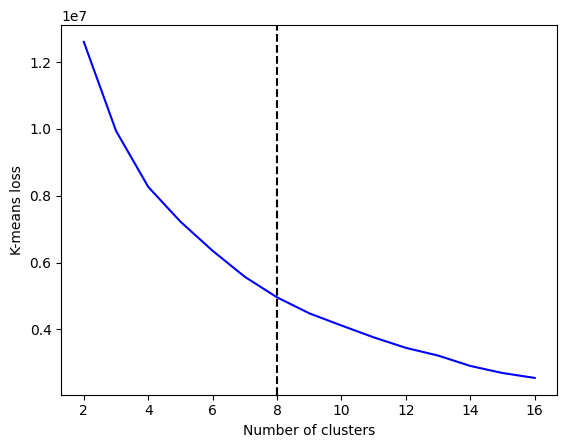

In [435]:
plt.plot(range(2,17),km_sse_score, c='blue')
plt.axvline(x=8,c='black', linestyle='--')  # add vertical line at x=6
plt.ylabel('K-means loss')
plt.xlabel('Number of clusters')
plt.xticks(range(2, 17, 2))  # set the x-axis ticks to integers from 2 to 20
# plt.savefig("K-means_loss_function.png")  # save the plot as a PNG file
# plt.ticklabel_format(style='plain')
plt.show()

In [436]:
def plot_heat_map(train,test,test_labels,dims,ks):
    sse_results = []
    
    for k in ks:
        k_sse_results = []
        
        for dim in dims:
            pca = PCA(n_components=dim)
            pca_emb_train = pca.fit_transform(train)
            pca_emb_test = pca.transform(test)
            
            kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_emb_train)
            clusters_km_test = kmeans.predict(pca_emb_test)
            
            kmeans_acc = accuracy_score(y_true=test_labels, y_pred=clusters_km_test)
            k_sse_results.append(kmeans.inertia_/10000000)
        
        sse_results.append(k_sse_results)

    sse_df = pd.DataFrame(sse_results, index=ks, columns=dims)

    return sse_df


In [437]:
sse_df = plot_heat_map(X_train,X_test,y_test,range(2,11),range(10,1,-1))

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

In [438]:
def create_heatmap(data):
    # Create a heatmap using seaborn's heatmap function
    ax = sns.heatmap(data, cmap="YlGnBu")

    # Set the title and axis labels of the heatmap
    ax.set_xlabel('Number of dimensions')
    ax.set_ylabel('Number of clusters')
#     plt.savefig("heatmap_music_sse.png")  # save the plot as a PNG file
    # Show the heatmap
    plt.show()


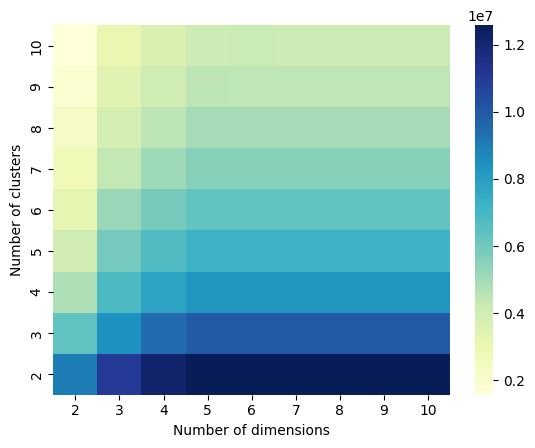

In [439]:
create_heatmap(sse_df)

In [440]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train[0:3000])

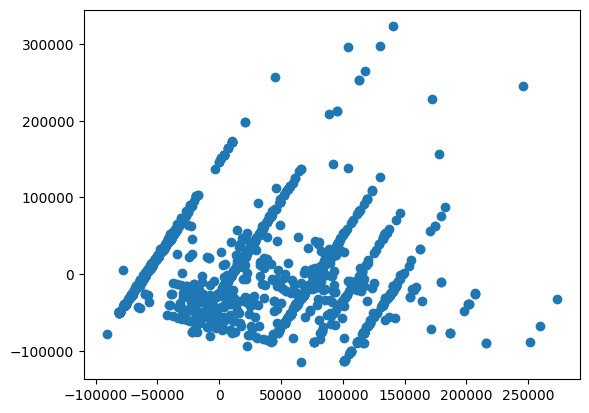

In [441]:
plt.scatter(X_train_pca[:, 0],X_train_pca[:, 1])
plt.show()

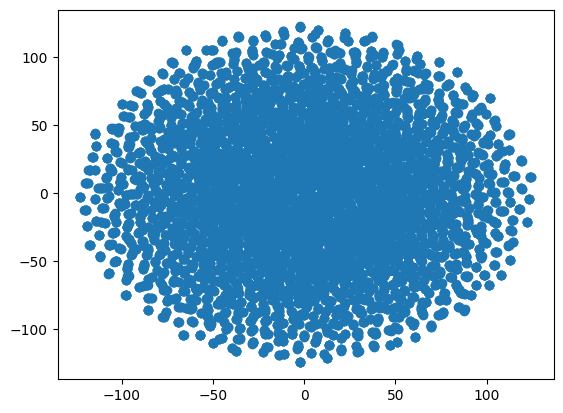

In [442]:
X_test_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X_test)
plt.scatter(X_test_tsne[:, 0],X_test_tsne[:, 1])
plt.show()

In [443]:
# Train KMeans model
kmeans = KMeans(n_clusters=8, random_state=42).fit(X_train)

# Predict clusters for test data
clusters_km_test = kmeans.predict(X_test)

# Get model evaluation metrics
silhouette_avg = silhouette_score(X_test, clusters_km_test)
kmeans_acc = accuracy_score(y_true=y_test, y_pred=clusters_km_test)

# Print results
print(f'KMeans accuracy: {round(kmeans_acc,3)*100:.1f}%')
print('Kmeans silhouette Score:', silhouette_avg)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans accuracy: 1.7%
Kmeans silhouette Score: 0.3895249466075543


In [444]:
from sklearn.cluster import AgglomerativeClustering

# Train HAC model
hac = AgglomerativeClustering(n_clusters=8).fit(X_train)
print(X_test.shape)
# Predict clusters for test data
clusters_hac_test = hac.fit_predict(X_test)

# Get model evaluation metrics
hac_acc = accuracy_score(y_true=y_test, y_pred=clusters_hac_test)
hac_silhouette_avg = silhouette_score(X_test, clusters_hac_test)

# Print results
print(f'HAC accuracy: {round(hac_acc,3)*100:.1f}%')
print('HAC Silhouette Score:', hac_silhouette_avg)

(8378, 11)
HAC accuracy: 5.1%
HAC Silhouette Score: 0.3251885701989874


(8378, 2)


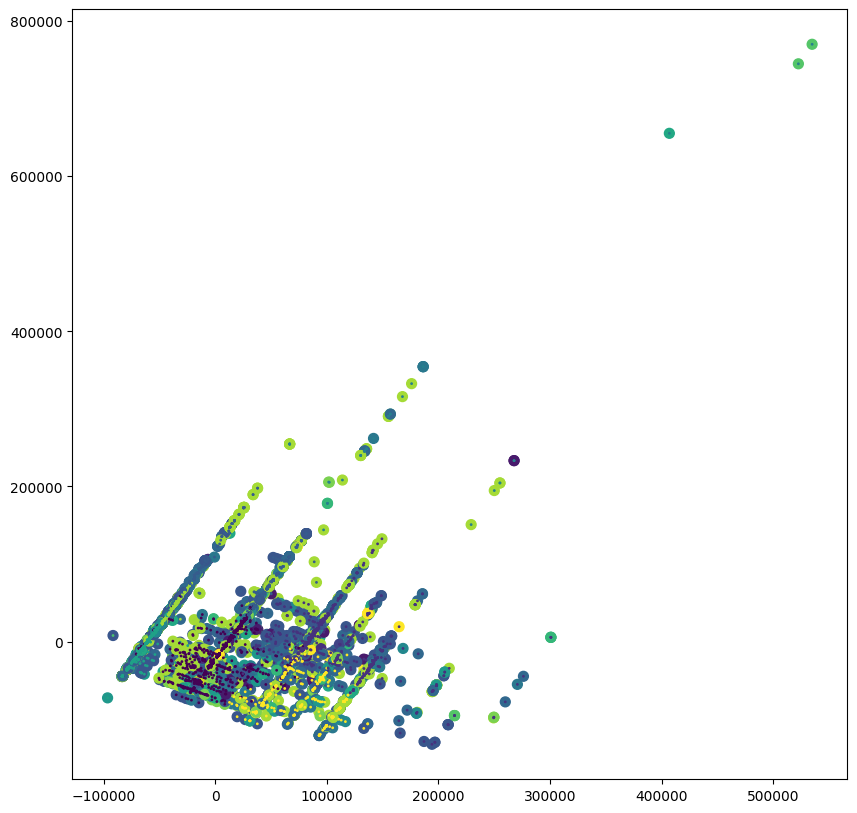

In [445]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
print(X_test_pca.shape)
plt.figure(figsize=(10, 10))  # specify the figure size as 5x5
plt.scatter(X_test_pca[:, 0],X_test_pca[:, 1],c=y_test,s=50)
plt.scatter(X_test_pca[:, 0],X_test_pca[:, 1],c=clusters_hac_test,s=1)
plt.show()

In [446]:
tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test)
print(X_test_pca.shape)

(8378, 2)


C:\Users\yuval\AppData\Local\Temp\ipykernel_7416\165698422.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))
C:\Users\yuval\AppData\Local\Temp\ipykernel_7416\165698422.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, format='')


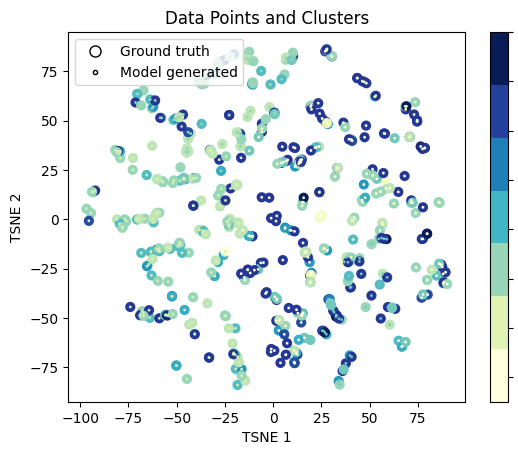

In [447]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap = "YlGnBu"
l = 500
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=y_test[0:l], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_hac_test[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_hac_test[0:l])

# Create a new color map using only the unique colors
new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))

# Plot the color bar using the new color map
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, format='')

# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Data Points and Clusters')
plt.savefig(f'music_resualts_plot_{cmap}.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [448]:
from scipy.stats import ttest_ind, f_oneway
import numpy as np
import matplotlib.pyplot as plt

# Calculate T-test
t_kmeans_hierarchical, p_kmeans_hierarchical = ttest_ind(y_kmeans, y_hierarchical)
t_kmeans_dbscan, p_kmeans_dbscan = ttest_ind(y_kmeans, y_dbscan)
t_kmeans_gmm, p_kmeans_gmm = ttest_ind(y_kmeans, y_gmm)
t_hierarchical_dbscan, p_hierarchical_dbscan = ttest_ind(y_hierarchical, y_dbscan)
t_hierarchical_gmm, p_hierarchical_gmm = ttest_ind(y_hierarchical, y_gmm)
t_dbscan_gmm, p_dbscan_gmm = ttest_ind(y_dbscan, y_gmm)

# Calculate ANOVA
f_statistic, p_value = f_oneway(clusters_km_test, clusters_hac_test)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Silhouette Scores
silhouette_scores = [silhouette_kmeans, silhouette_hierarchical, silhouette_dbscan, silhouette_gmm]
methods = ['KMeans', 'Hierarchical', 'DBSCAN', 'GMM']
ax[0].bar(methods, silhouette_scores)
ax[0].set_ylabel('Silhouette Score')
ax[0].set_title('Comparison of Silhouette Scores')

# Plot T-test results
t_test_results = [p_kmeans_hierarchical, p_kmeans_dbscan, p_kmeans_gmm, p_hierarchical_dbscan, p_hierarchical_gmm, p_dbscan_gmm]
x = np.arange(len(t_test_results))
ax[1].bar(x, t_test_results)
ax[1].set_xticks(x)
ax[1].set_xticklabels(['KMeans vs. Hierarchical', 'KMeans vs. DBSCAN', 'KMeans vs. GMM', 'Hierarchical vs. DBSCAN', 'Hierarchical vs. GMM', 'DBSCAN vs. GMM'], rotation=45)
ax[1].set_ylabel('P-value')
ax[1].set_title('T-Test Results')

# Plot ANOVA results
ax[2].boxplot([y_kmeans, y_hierarchical, y_dbscan, y_gmm])
ax[2].set_xticklabels(['KMeans', 'Hierarchical', 'DBSCAN', 'GMM'])
ax[2].set_ylabel('Cluster Label')
ax[2].set_title('ANOVA Results')

plt.show()


NameError: name 'y_kmeans' is not defined

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("songs_data.csv", delimiter=",")

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Fit the One-Class SVM model
clf = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(data)

# Predict the labels for the data points
labels = clf.predict(data)

# Plot the data points, with outliers highlighted in red
fig, ax = plt.subplots(figsize=(8, 6))
colors = np.array(['blue', 'red'])
ax.scatter(data[:, 0], data[:, 1], c=colors[(labels + 1) // 2], s=10)
ax.set_title('One-Class SVM Outlier Detection')

# Get the distances of the data points to the hyperplane
distances = clf.decision_function(data)

# Plot a histogram of the distances
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(distances, bins=50, color='blue', alpha=0.5)
ax.set_title('Histogram of Distances to Hyperplane')
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')

# Identify the outliers
outliers = data[np.where(labels == -1)]

# Save the outliers to a file
np.savetxt("outliers.csv", outliers, delimiter=",")

# Perform clustering on the data without the outliers
data_no_outliers = data[np.where(labels == 1)]
# ...insert code here to perform clustering on data_no_outliers...


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("songs_data.csv", delimiter=",")

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Fit the LOF model
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels_lof = clf_lof.fit_predict(data)

# Fit the GMM model
clf_gmm = GaussianMixture(n_components=2, covariance_type='full')
clf_gmm.fit(data)
labels_gmm = clf_gmm.predict(data)

# Plot the data points, with outliers highlighted in red
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].scatter(data[:, 0], data[:, 1], c=labels_lof, cmap='coolwarm', s=10)
ax[0, 0].set_title('LOF Anomaly Detection')
ax[0, 1].scatter(data[:, 0], data[:, 1], c=labels_gmm, cmap='coolwarm', s=10)
ax[0, 1].set_title('GMM Anomaly Detection')

# Get the scores of the data points for LOF and GMM
scores_lof = clf_lof.negative_outlier_factor_
scores_gmm = clf_gmm.score_samples(data)

# Plot histograms of the scores
ax[1, 0].hist(scores_lof, bins=50, color='blue', alpha=0.5)
ax[1, 0].set_title('Histogram of LOF Scores')
ax[1, 0].set_xlabel('Score')
ax[1, 0].set_ylabel('Frequency')
ax[1, 1].hist(scores_gmm, bins=50, color='blue', alpha=0.5)
ax[1, 1].set_title('Histogram of GMM Scores')
ax[1, 1].set_xlabel('Score')
ax[1, 1].set_ylabel('Frequency')

# Identify the outliers for LOF and GMM
outliers_lof = data[np.where(labels_lof == -1)]
outliers_gmm = data[np.where(scores_gmm < np.percentile(scores_gmm, 5))]

# Save the outliers to a file
np.savetxt("outliers_lof.csv", outliers_lof, delimiter=",")
np.savetxt("outliers_gmm.csv", outliers_gmm, delimiter=",")

# Perform clustering on the data without the outliers
data_no_outliers_lof = data[np.where(labels_lof == 1)]
# ...insert code here to perform clustering on data_no_outliers_lof...

data_no_outliers_gmm = data[np.where(scores_gmm >= np.percentile(scores_gmm, 5))]
# ...insert code here to perform clustering on data_no_outliers_gmm...


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Identify outliers using the best anomaly detection method
outliers = one_class_svm.predict(X) == -1
X_no_outliers = X[~outliers]

# Fit the best clustering algorithm to the data without outliers
best_clustering_algorithm.fit(X_no_outliers)

# Predict cluster labels for the original data
y_pred = best_clustering_algorithm.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
from sklearn.manifold import TSNE, Isomap
import matplotlib.pyplot as plt

# Define t-SNE and Isomap transformers
tsne = TSNE(n_components=2, random_state=42)
isomap = Isomap(n_components=2, random_state=42)

# Fit transformers to the data without outliers
X_tsne = tsne.fit_transform(X_no_outliers)
X_isomap = isomap.fit_transform(X_no_outliers)

# Plot clusters using t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=best_clustering_algorithm.labels_)
plt.title('Clusters using t-SNE')
plt.show()

# Plot clusters using Isomap
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=best_clustering_algorithm.labels_)
plt.title('Clusters using Isomap')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import adjusted_mutual_info_score, silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# Generate some sample data
X = np.random.rand(100, 5)

# Run clustering algorithms
algorithms = [
    ('K-means, k=2', KMeans(n_clusters=2)),
    ('K-means, k=3', KMeans(n_clusters=3)),
    ('K-means, k=4', KMeans(n_clusters=4)),
    ('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
    ('Agglomerative clustering', AgglomerativeClustering(n_clusters=3))
]

best_algorithm = None
best_silhouette_score = -1

# Run each algorithm and record its silhouette score
silhouette_scores = []
for name, algorithm in algorithms:
    algorithm.fit(X)
    labels = algorithm.labels_
    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        if silhouette_avg > best_silhouette_score:
            best_algorithm = algorithm
            best_silhouette_score = silhouette_avg
    else:
        silhouette_scores.append(0)

# A. Plot silhouette score for each algorithm on best combination of clusters
plt.bar([a[0] for a in algorithms], silhouette_scores)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel('Silhouette score')
plt.title('Silhouette score on best combination of clusters')
plt.show()

# Get labels for best algorithm
best_algorithm.fit(X)
labels = best_algorithm.labels_

# B. Calculate mutual information for each algorithm
mi_scores = []
for name, algorithm in algorithms:
    algorithm.fit(X)
    mi_score = adjusted_mutual_info_score(labels, algorithm.labels_)
    mi_scores.append(mi_score)

plt.bar([a[0] for a in algorithms], mi_scores)
plt.xticks(rotation=45)
plt.ylabel('Mutual information score')
plt.title('Mutual information about best combination of clusters')
plt.show()

# D. Silhouette visualization of best algorithm
cluster_labels = np.unique(labels)
n_clusters = len(cluster_labels)
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_lower, y_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = plt.cm.Spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette plot of best algorithm')
plt.show()

# ######################################################

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X[:20000], Y[:20000], test_size=0.25, random_state=42)

In [489]:
len(X_test)

5000

## Clustering

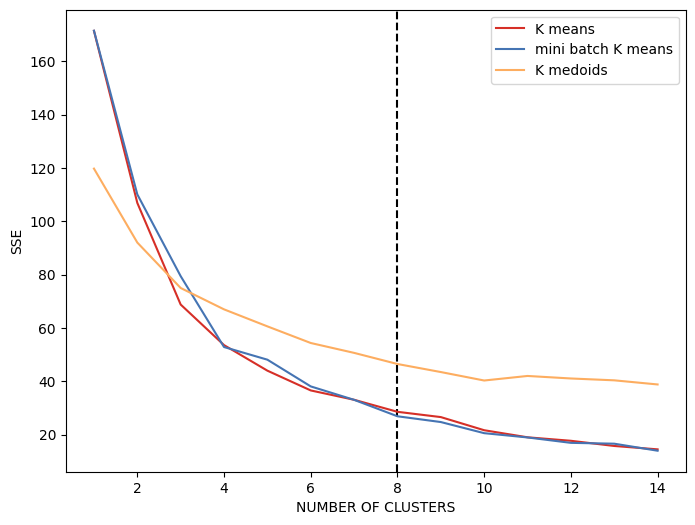

In [525]:
import matplotlib.pyplot as plt
import numpy as np

# Create random data
np.random.seed(42)
X_train = np.random.randn(100, 2)

# Calculate SSE for KMeans, MiniBatchKMeans, and KMedoids clustering algorithms
sse_score_km = []
sse_score_mbkm = []
sse_score_kmed = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    kmeans.predict(X_train)
    sse_score_km.append(kmeans.inertia_)

    mbkm = MiniBatchKMeans(n_clusters=k, n_init="auto").fit(X_train)
    mbkm.predict(X_train)
    sse_score_mbkm.append(mbkm.inertia_)

    kmed = KMedoids(n_clusters=k).fit(X_train)
    kmed.predict(X_train)
    sse_score_kmed.append(kmed.inertia_)

# Define the RdYlBd colormap
colormap = plt.cm.RdYlBu_r

# Plot SSE scores for KMeans, MiniBatchKMeans, and KMedoids clustering algorithms
plt.figure(figsize=(8, 6))

plt.plot(range(1, 15), sse_score_km, c=colormap(0.9), zorder=3, label="K means")
plt.plot(range(1, 15), sse_score_mbkm, c=colormap(0.1), zorder=3, label="mini batch K means")
plt.plot(range(1, 15), sse_score_kmed, c=colormap(0.7), zorder=3, label="K medoids")


# Add a black dashed line at x=6
plt.axvline(x=8, linestyle='--', color='black')

plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('SSE')
plt.legend()

# Save the plot as a PNG image
plt.savefig('sse_scores.png', dpi=300)

plt.show()


In [490]:

tsne =PCA(2)
tsne_emb_train = tsne.fit_transform(X_train)
tsne_emb_test = tsne.fit_transform(X_test)

In [491]:
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

In [492]:
k=8

In [493]:
#KMEANS
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
clusters_km = kmeans.predict(X_train)

In [494]:
#minibatch k means
mbkm = MiniBatchKMeans(n_clusters=k).fit(X_train)
clusters_mbkm = mbkm.predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [495]:
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_train)

In [496]:
#GMM
gmm = GaussianMixture(n_components=k)
gmm.fit(X_train)
clusters_gmm = gmm.predict(X_train)

In [497]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
clusters_hier = hierarchical_clustering.fit_predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


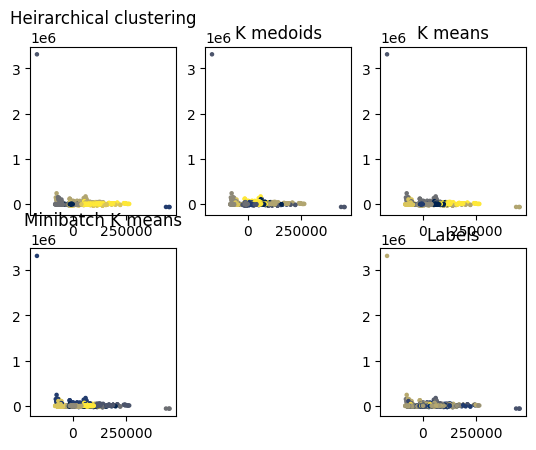

In [498]:
predicted_clusters = [[int(x) for x in hierarchical_clustering.fit_predict(X_test)],
                      [int(x) for x in kmedoids.predict(X_test)],
                      [int(x) for x in kmeans.predict(X_test)],
                      [int(x) for x in mbkm.predict(X_test)]]
methods = ["Heirarchical clustering", "K medoids", "K means", "Minibatch K means"]

for i, method, cluster in zip(range(1,5), methods, predicted_clusters):
    plt.subplot(2,3,i)
    plt.scatter(tsne_emb_test[:,0], tsne_emb_test[:,1], c=cluster,s=5, cmap="cividis_r")
    plt.title(method)

plt.subplot(2,3,6)
plt.scatter(tsne_emb_test[:,0], tsne_emb_test[:,1], c=y_test,s=5, cmap="cividis_r")
plt.title("Labels")    
plt.show()

### Statistical Tests

In [499]:
len(y_test)

5000

In [500]:
#mutual information
from sklearn.metrics import mutual_info_score

def calculate_mi_on_groups(cluster, labels, r, g):
    mi = []
    for i in range(0,r): 
        clusters_group = cluster[i*g: (i+1)*g]
        labels_group = labels[i*g: (i+1)*g]
        mi.append(mutual_info_score(clusters_group, labels_group))
    return mi  

In [501]:

labels_list_train = y_train
labels_list_test = y_test

mutual_informations = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mutual_informations.append(calculate_mi_on_groups(cluster_, y_test, 50, 100))
    print(f"mutual information between {method_} and the ground truth is {np.mean(calculate_mi_on_groups(cluster_, y_test, 50, 100))}")

mutual information between Heirarchical clustering and the ground truth is 0.3770152776493563
mutual information between K medoids and the ground truth is 0.4571062628180671
mutual information between K means and the ground truth is 0.4115828626965893
mutual information between Minibatch K means and the ground truth is 0.39401595015826196


mutual information between Heirarchical clustering and the ground truth is 0.3770152776493563
mutual information between K medoids and the ground truth is 0.4571062628180671
mutual information between K means and the ground truth is 0.4115828626965893
mutual information between Minibatch K means and the ground truth is 0.39401595015826196


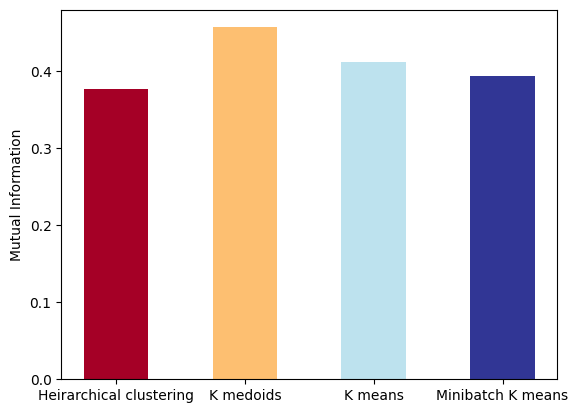

In [520]:
import matplotlib.pyplot as plt
import numpy as np

#Define the colormap
cmap = plt.get_cmap('RdYlBu')

labels_list_train = y_train
labels_list_test = y_test

mutual_informations = []
labels = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mi = calculate_mi_on_groups(cluster_, y_test, 50, 100)
    mutual_informations.append(np.mean(mi))
    labels.append(method_)
    print(f"mutual information between {method_} and the ground truth is {np.mean(mi)}")

#Plot the bar graph
fig, ax = plt.subplots()
bars = ax.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

#Add labels and title
ax.set_ylabel('Mutual Information')
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
plt.savefig('mutual_information_plot_music.png', dpi=300, bbox_inches='tight')

plt.show()

In [502]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_informations)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

t-statistic = 13.40, p-value = 5.41e-08 = 0.00000


In [503]:
from scipy.stats import ttest_ind

dueos = [(0,1), (1,2), (1,3)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # print the result
    print(f"t test between {methods[i]} and {methods[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")


t test between Heirarchical clustering and K medoids
t-statistic = -5.92, p-value = 4.70e-08 = 0.00000
 
t test between K medoids and K means
t-statistic = 3.25, p-value = 1.57e-03 = 0.00157
 
t test between K medoids and Minibatch K means
t-statistic = 4.59, p-value = 1.33e-05 = 0.00001
 


## Annomaly detection

In [504]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [505]:
#LOF
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.01)
y_pred_lof = lof.fit_predict(X_train)
y_pred_lof
y_pred_lof_test = lof.fit_predict(X_test)

In [506]:
#Isolation Forest
isolation_forest = IsolationForest(n_estimators=500, contamination=0.01)
y_pred_if = isolation_forest.fit_predict(X_train)
y_pred_if
y_pred_if_test = isolation_forest.fit_predict(X_test)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [507]:
#One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.01)
one_class_svm.fit(X_train)
y_pred_ocsvm = one_class_svm.predict(X_train)
y_pred_ocsvm
y_pred_ocsvm_test = one_class_svm.predict(X_test)

In [508]:
# Print the number of anomalies
print("LOF detected", np.sum(y_pred_lof == -1), "anomalies")
print("LOF detected on the test set", np.sum(y_pred_lof_test == -1), "anomalies")
print("Isolation Forest detected", np.sum(y_pred_if == -1), "anomalies")
print("Isolation Forest detected on the test set", np.sum(y_pred_if_test == -1), "anomalies")
print("One-Class SVM detected", np.sum(y_pred_ocsvm == -1), "anomalies")
print("One-Class SVM detected on the test set", np.sum(y_pred_ocsvm_test == -1), "anomalies")

LOF detected 150 anomalies
LOF detected on the test set 50 anomalies
Isolation Forest detected 150 anomalies
Isolation Forest detected on the test set 50 anomalies
One-Class SVM detected 132 anomalies
One-Class SVM detected on the test set 38 anomalies


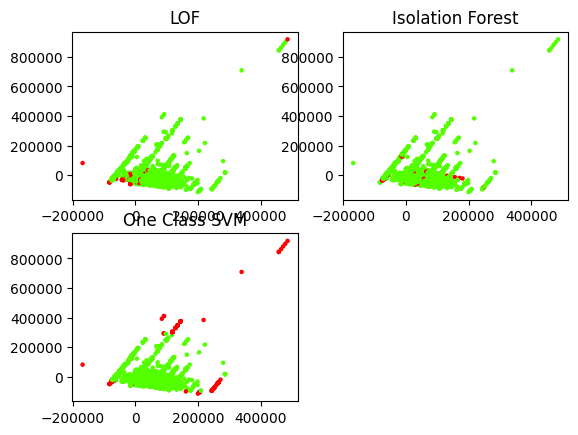

In [509]:
methods_ad = [y_pred_lof, y_pred_if, y_pred_ocsvm]
names = ["LOF", "Isolation Forest", "One Class SVM"]
for i, method, name in zip(range(1,4), methods_ad, names):
    plt.subplot(2,2,i)
    plt.scatter(tsne_emb_train[:,0], tsne_emb_train[:,1], c=method ,s=5, cmap="prism")
    plt.title(name)

plt.show()

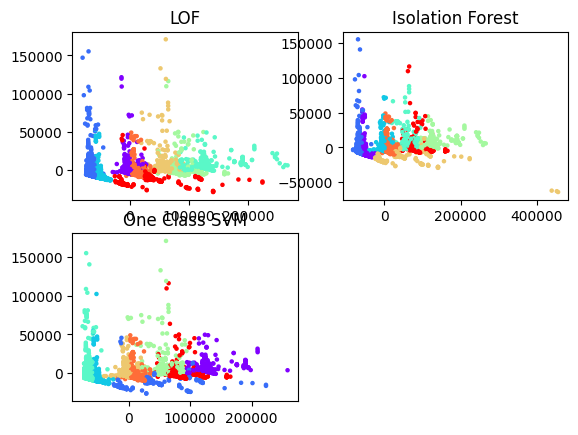

In [510]:
mutual_information_ad = []
methods_ad = [(y_pred_lof, y_pred_lof_test), (y_pred_if,y_pred_if_test), (y_pred_ocsvm,y_pred_ocsvm_test)]
names = ["LOF", "Isolation Forest", "One Class SVM"]

for i, anom, name, rg in zip(range(1,4), methods_ad, names, [(30, 165), (30, 165), (34, 146)]):
    X_train_clean = X_train[anom[0] != -1]
    X_test_clean = X_test[anom[1] != -1]
    kmedoids = KMedoids(n_clusters=k, metric='euclidean').fit(X_train_clean)
    clusters_kmedoids = kmedoids.predict(X_test_clean)
    
    plt.subplot(2,2,i)
    plt.scatter(tsne_emb_test[anom[1] != -1,0], tsne_emb_test[anom[1] != -1,1], c=clusters_kmedoids,s=5, cmap="rainbow")
    plt.title(name)

    mutual_information_ad.append(calculate_mi_on_groups(clusters_kmedoids, np.array(y_test)[anom[1] != -1], rg[0], rg[1]))
plt.show()

In [511]:
for name, score in zip(names, mutual_information_ad):
    print(f"mutual information between {name} and the ground truth is {np.mean(score)}")

mutual information between LOF and the ground truth is 0.37367807904783096
mutual information between Isolation Forest and the ground truth is 0.36874079722815795
mutual information between One Class SVM and the ground truth is 0.38974253848580753


In [512]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_information_ad)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

t-statistic = 1.28, p-value = 2.82e-01 = 0.28178


In [513]:
from scipy.stats import ttest_ind

dueos = [(0,2), (0,1), (1,2)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # print the result
    print(f"t test between {names[i]} and {names[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")

t test between LOF and One Class SVM
t-statistic = -2.69, p-value = 8.45e-03 = 0.00845
 
t test between LOF and Isolation Forest
t-statistic = -5.92, p-value = 4.70e-08 = 0.00000
 
t test between Isolation Forest and One Class SVM
t-statistic = 3.25, p-value = 1.57e-03 = 0.00157
 


**no one better AD method**

### Check if there is an improvment in the clustering with LOF


In [514]:
#train the with AD model
X_test_clean = X_test[y_pred_if_test != -1]
kmedoids_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_ad.fit(X_train)
clusters_ad = kmedoids.predict(X_test_clean)

count = 0
clusters_with_anomalys = []
for i in range(0, len(X_test)):
    if y_pred_if_test[i] == -1:
        clusters_with_anomalys.append(-1)
        count+=1
    else:
        clusters_with_anomalys.append(clusters_ad[i-count])
    
print(f"mutual information between WITH AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_with_anomalys, y_test, 50, 100))}")

#train the no AD model
kmedoids_no_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_no_ad.fit(X_train)
clusters_no_ad = kmedoids.predict(X_test)

print(f"mutual information between NO AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_no_ad, y_test, 50, 100))}")


mutual information between WITH AD and the ground truth is 0.48068400957474644
mutual information between NO AD and the ground truth is 0.4571062628180671


In [515]:
from scipy.stats import ttest_ind

# perform t-test
t_statistic, p_value = ttest_ind(calculate_mi_on_groups(clusters_with_anomalys, labels_list_test, 50, 100), calculate_mi_on_groups(clusters_no_ad, labels_list_test, 50, 100))

# print the result
print(f"t test between WITH AD and NO AD")
print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))


t test between WITH AD and NO AD
t-statistic = 1.57, p-value = 1.19e-01 = 0.11914


(600, 2)


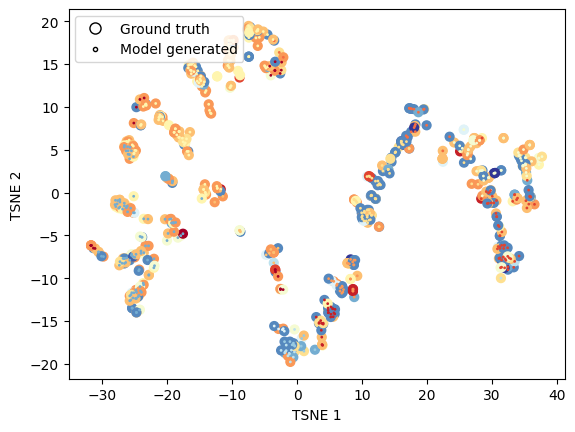

In [542]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

l = 600


#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test[:l])

tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test[:l])
print(X_test_tsne.shape)

cmap = "RdYlBu"
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=[int(x) for x in list(y_test[0:l])], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_kmedoids[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.savefig(f'resualts_music_plot_RdYlBu_last_last.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [544]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.neighbors import LocalOutlierFactor

def plot_lof_anomalies(data):
    # Fit the LOF model to the data
    lof = LocalOutlierFactor(n_neighbors=20)
    y_pred = lof.fit_predict(data)
    scores = -lof.negative_outlier_factor_

    # Scale the scores to the range [0, 1]
    scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

    # Count the number of points in each score bin
    bins = np.linspace(0, 1, num=100)
    hist, _ = np.histogram(scores, bins=bins)

    # Plot the anomaly score histogram as a bar plot
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), align='edge', color=cm.Accent(0.1), edgecolor='black')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Number of Points')
    
    # Add a black dashed line at the 10% mark
    percentile_1 = np.percentile(scores, 99)
    percentile_10 = np.percentile(scores, 90)
    plt.axvline(x=percentile_1, linestyle='--', color="red", label="1%")
    plt.axvline(x=percentile_10, linestyle='--', color='fuchsia', label="10%")
    
    plt.legend()
    plt.savefig("AD_plot_music.png", dpi=300, bbox_inches='tight')

    plt.show()
    


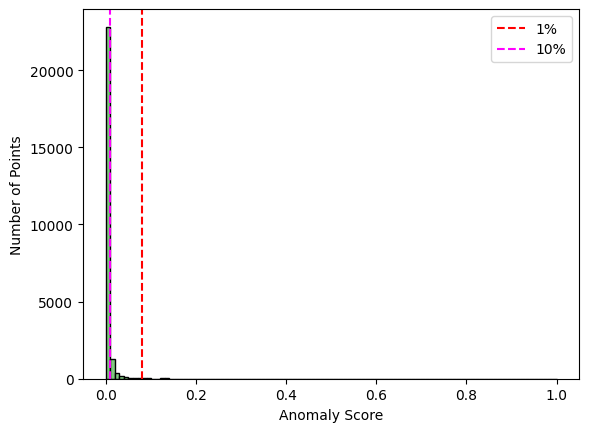

In [545]:
plot_lof_anomalies(X_train)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn_extra.cluster import KMedoids
from matplotlib.colors import ListedColormap

def k_medoids_silhouette(data, labels, k):
    # Create KMedoids model with k clusters
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(data)
    
    # Get cluster labels and compute silhouette scores
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Set up colormap and plot silhouette scores
    cmap = ListedColormap(plt.cm.RdYlBu(np.linspace(0, 1, k)))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cmap(i)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10
    
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.savefig("Silhouette_plot_music.png", dpi=300, bbox_inches='tight')
    plt.show()


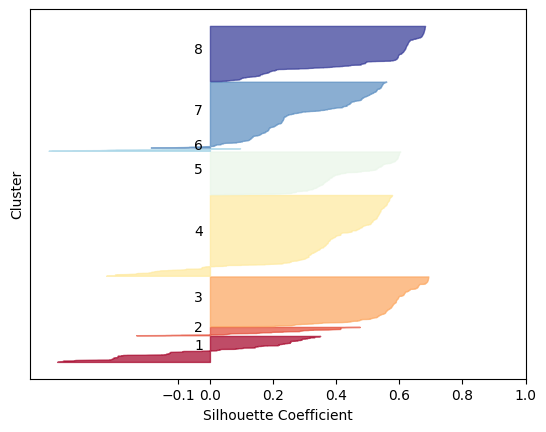

In [13]:
k_medoids_silhouette(X_test, y_test, 8)